# **Model Analysis**

In [36]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
from scipy.stats import pearsonr
import matplotlib.colors as mcolors

## Differential

In [37]:
# parameter statistics

RAll = pd.read_csv('../Outputs/Lmfit_RHM_Dif.csv')

params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'BIC', 'R^2']

print('Average RHM Weights')
for i in params:
    print( i + ' Mean: ' + str(np.mean(RAll[i])))
    print( i + ' Median: ' + str(np.median(RAll[i])))
    print( i + ' SD: ' + str(np.std(RAll[i])))

print('\n')

DCAll = pd.read_csv('../Outputs/Lmfit_DC_Dif.csv')

params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Baseline', 'Forgetting Factor', 'Linear Attraction', 'Cubic Attraction', 'BIC', 'R^2']

print('Average DynAffect-C Weights')
for i in params:
    print( i + ' Mean: ' + str(np.mean(DCAll[i])))
    print( i + ' Median: ' + str(np.median(DCAll[i])))
    print( i + ' SD: ' + str(np.std(DCAll[i])))

# determine types of attraction dynamics
positive = 0
negative = 0
pos_neg = 0
neg_pos = 0
for i in range(0, len(DCAll)):
    if (DCAll['Cubic Attraction'][i]>=0):
        if (DCAll['Linear Attraction'][i]>0):
            positive += 1
        else:
            pos_neg += 1
    else:
        if (DCAll['Linear Attraction'][i]>0):
            neg_pos += 1
        else:
            negative += 1
print('Alpha positive, Beta positive: ', positive)
print('Alpha positive, Beta negative: ', pos_neg)
print('Alpha negative, Beta positive: ', neg_pos)
print('Alpha negative, Beta negative: ', negative)


Average RHM Weights
Certain Reward Mean: 0.0826981823293739
Certain Reward Median: 0.05
Certain Reward SD: 0.2721054511885474
Expected Value Mean: 0.062288296551912564
Expected Value Median: 0.0446535980942244
Expected Value SD: 0.19186145659008486
Prediction Error Mean: 0.1465394657905744
Prediction Error Median: 0.10578336142379345
Prediction Error SD: 0.19770451535617808
Forgetting Factor Mean: 0.5053428639810214
Forgetting Factor Median: 0.5400434919699166
Forgetting Factor SD: 0.339249307827832
BIC Mean: 50.94508076800851
BIC Median: 50.81957173184084
BIC SD: 18.800774231763214
R^2 Mean: 0.596217058736573
R^2 Median: 0.632862571730459
R^2 SD: 0.22995536514820927


Average DynAffect-C Weights
Certain Reward Mean: 0.06430910487169848
Certain Reward Median: 0.05
Certain Reward SD: 0.2500170027516133
Expected Value Mean: 0.05225159303812315
Expected Value Median: 0.0356487442544859
Expected Value SD: 0.16135167906149395
Prediction Error Mean: 0.11774911142893102
Prediction Error Media

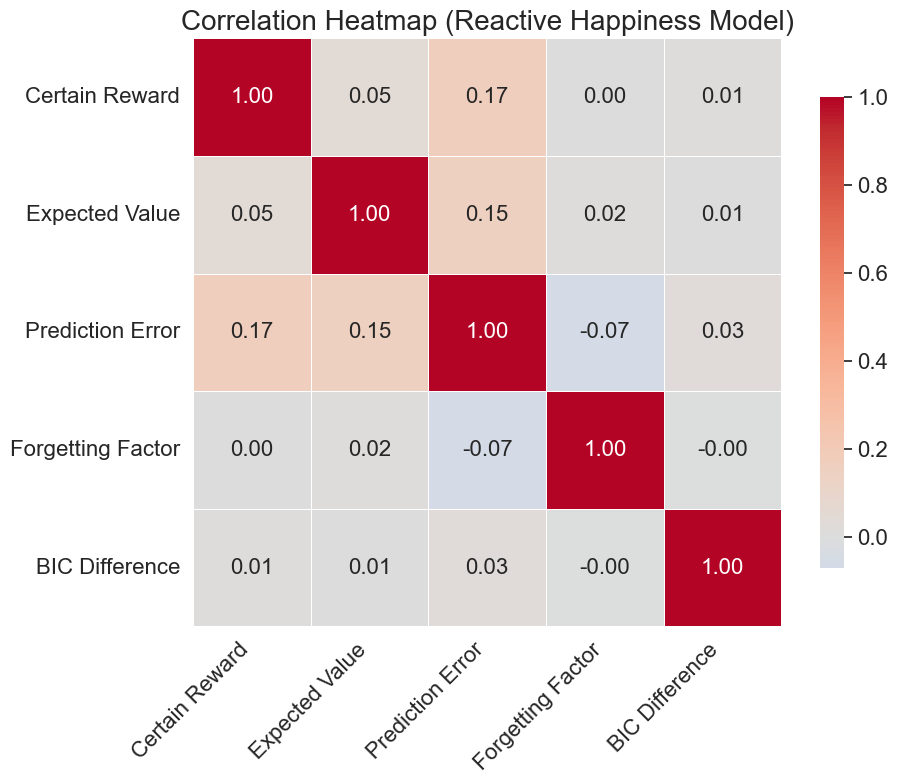

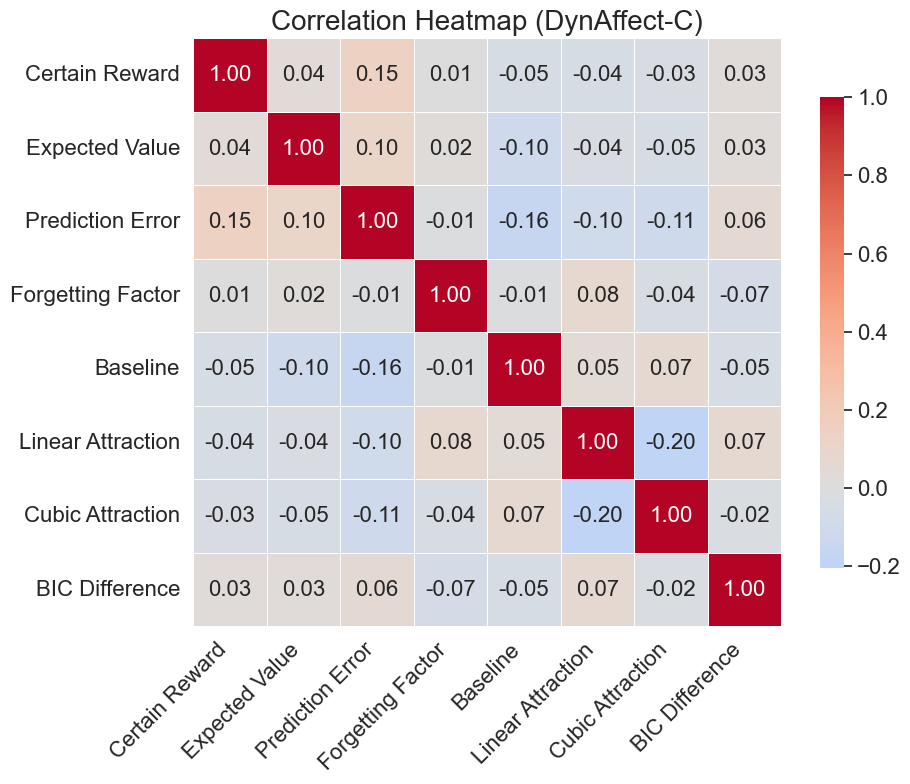

|Beta| and BIC Difference Correlation:  PearsonRResult(statistic=-0.22828023738197822, pvalue=2.895094187019686e-172)


In [38]:
diff = DCAll['BIC'] - RAll['BIC']
RAll['BIC Difference'] = diff
DCAll['BIC Difference'] = diff

# correlation/p-value function
def correlation_with_pvalues(df, params):
    cols = params
    corr_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)
    pval_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)

    for param1 in cols:
        for param2 in cols:
            corr, pval = pearsonr(df[param1], df[param2])
            corr_matrix.loc[param1, param2] = corr
            pval_matrix.loc[param1, param2] = pval

    return corr_matrix, pval_matrix

# heatmap plotting function
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 16})
    plt.title(title, fontsize=20)
    plt.xticks(rotation=45, ha='right', fontsize = 16)
    plt.yticks(rotation=0, fontsize=16)
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=16)
    plt.tight_layout()
    plt.savefig('../Figures/' + title + '_Dif.png', dpi=1200)
    plt.show()
    
# generate RHM heatmap
params1 = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'BIC Difference']
corr_matrix_rall, _, = correlation_with_pvalues(RAll, params1)
plot_heatmap(corr_matrix_rall, "Correlation Heatmap (Reactive Happiness Model)")

# generate DC heatmap
params2 = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'Linear Attraction', 'Cubic Attraction', 'BIC Difference']
corr_matrix_dcall, _, = correlation_with_pvalues(DCAll, params2)
plot_heatmap(corr_matrix_dcall, "Correlation Heatmap (DynAffect-C)")

DCAll['absBeta'] = np.abs(DCAll['Linear Attraction'])
print('|Beta| and BIC Difference Correlation: ', pearsonr(DCAll['absBeta'], DCAll['BIC Difference']))

Forgetting factor difference:  TtestResult(statistic=-33.41664729879213, pvalue=5.252605147888878e-236, df=14629)


Text(0.5, 1.0, 'Forgetting Factor vs Linear Attraction Correlation')

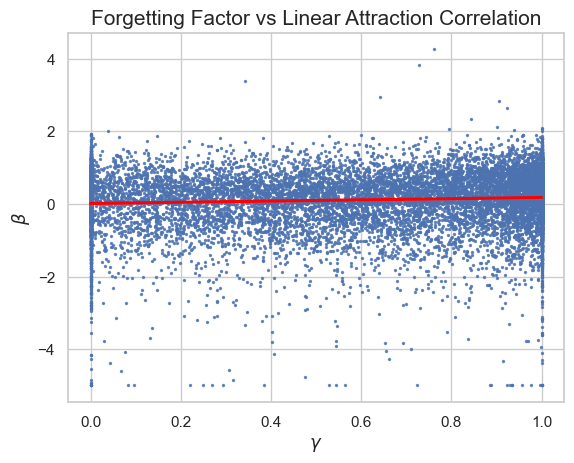

In [39]:
# forgetting factor analysis

print('Forgetting factor difference: ', stat.ttest_rel(RAll['Forgetting Factor'], DCAll['Forgetting Factor']))

sns.regplot(y=DCAll['Linear Attraction'], x=DCAll['Forgetting Factor'], line_kws={'color': 'red'}, scatter_kws={'s':2})
plt.xlabel(r'$\gamma$', fontsize=13)
plt.ylabel(r'$\beta$', fontsize=13)
plt.title('Forgetting Factor vs Linear Attraction Correlation', fontsize=15)

In [40]:
# calculate effect sizes

def cohen_d(group1, group2):

    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1, ddof=1)  # sample std
    std2 = np.std(group2, ddof=1)

    # pooled standard deviation
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))

    # cohen's d
    cohens_d = (mean1 - mean2) / pooled_std
    return cohens_d

print('BIC Difference: ', stat.ttest_rel(DCAll['BIC'], RAll['BIC']))
print('Forgetting Factor: ', stat.ttest_rel(DCAll['Forgetting Factor'], RAll['Forgetting Factor']))
print(f"Cohen's d (change in forgetting factor): {cohen_d(DCAll['Forgetting Factor'], RAll['Forgetting Factor']):.3f}")
SINDy_original = pd.read_csv('../Outputs/SINDy_RHM.csv')
SINDy_DC = pd.read_csv('../Outputs/SINDy_DC.csv')
print(f"Cohen's d (original happiness model SINDy and OLS): {cohen_d(RAll['R^2'], SINDy_original['R^2']):.3f}")
print(f"Cohen's d (DynAffect-C SINDy and OLS): {cohen_d(DCAll['R^2'], SINDy_DC['R^2']):.3f}")
print(f"Cohen's d (DynAffect-C and original happines model BIC): {cohen_d(DCAll['BIC'], RAll['BIC']):.3f}")

BIC Difference:  TtestResult(statistic=-27.195080669890196, pvalue=6.443347132213695e-159, df=14629)
Forgetting Factor:  TtestResult(statistic=33.41664729879213, pvalue=5.252605147888878e-236, df=14629)
Cohen's d (change in forgetting factor): 0.256
Cohen's d (original happiness model SINDy and OLS): 0.759
Cohen's d (DynAffect-C SINDy and OLS): 0.683
Cohen's d (DynAffect-C and original happines model BIC): -0.115


/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_57791/2039023286.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_57791/2039023286.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_57791/2039023286.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined

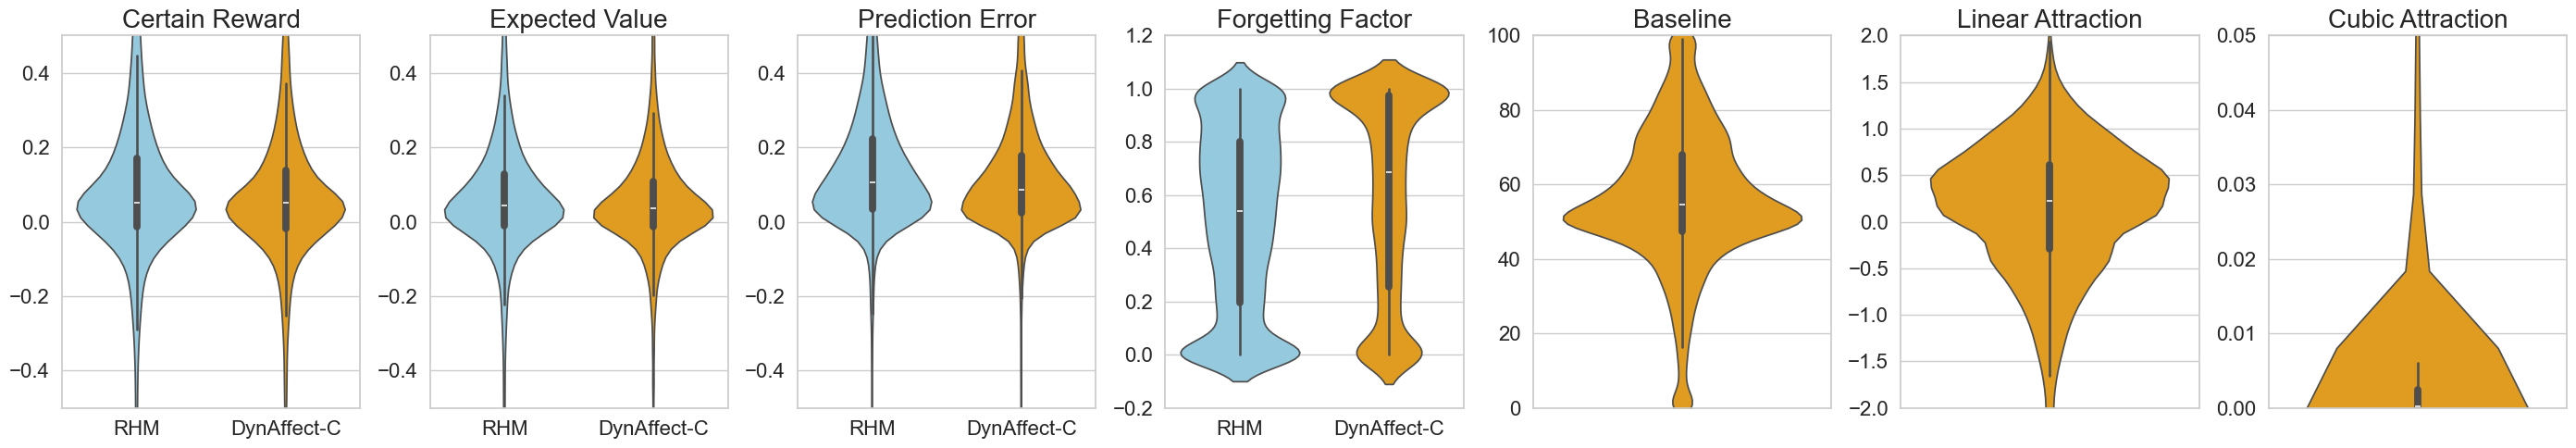

In [41]:
# generate violin plots

# parameters to compare
common_params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor']
dynonly_params = ['Baseline', 'Linear Attraction', 'Cubic Attraction']

# prepare combined dataframe for common parameters
combined_data = pd.concat([
    RAll[common_params].assign(Model='RHM'),
    DCAll[common_params].assign(Model='DynAffect-C')
])

palette = {'RHM': 'skyblue', 'DynAffect-C': 'orange'}
sns.set(style='whitegrid')
n_plots = len(common_params) + len(dynonly_params)
fig, axes = plt.subplots(1, n_plots, figsize=(4 * n_plots, 5), sharey=False)

# plot shared parameters with both models
for i, param in enumerate(common_params):
    sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
    axes[i].set_title(param, fontsize=20)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', labelsize=16)
    axes[i].tick_params(axis='x', labelsize=16)

# plot DynAffect-only parameters (Baseline, Beta, Alpha)
for j, param in enumerate(dynonly_params):
    sns.violinplot(data=DCAll, y=param, color='orange', ax=axes[len(common_params) + j])
    axes[len(common_params) + j].set_title(param, fontsize=20)
    axes[len(common_params) + j].set_xlabel('')
    axes[len(common_params) + j].set_ylabel('')
    axes[len(common_params) + j].set_xticks([])
    axes[len(common_params) + j].tick_params(axis='y', labelsize=16)

axes[0].set_ylim([-0.5, 0.5])
axes[1].set_ylim([-0.5, 0.5])
axes[2].set_ylim([-0.5, 0.5])
axes[3].set_ylim([-0.2, 1.2])
axes[4].set_ylim([0, 100])
axes[5].set_ylim([-2, 2])
axes[6].set_ylim([0, 0.05])

plt.tight_layout()
plt.savefig('../Figures/violin_Dif.png', dpi=1200)
plt.show()

## Posterior Predictive Checks (Differential)

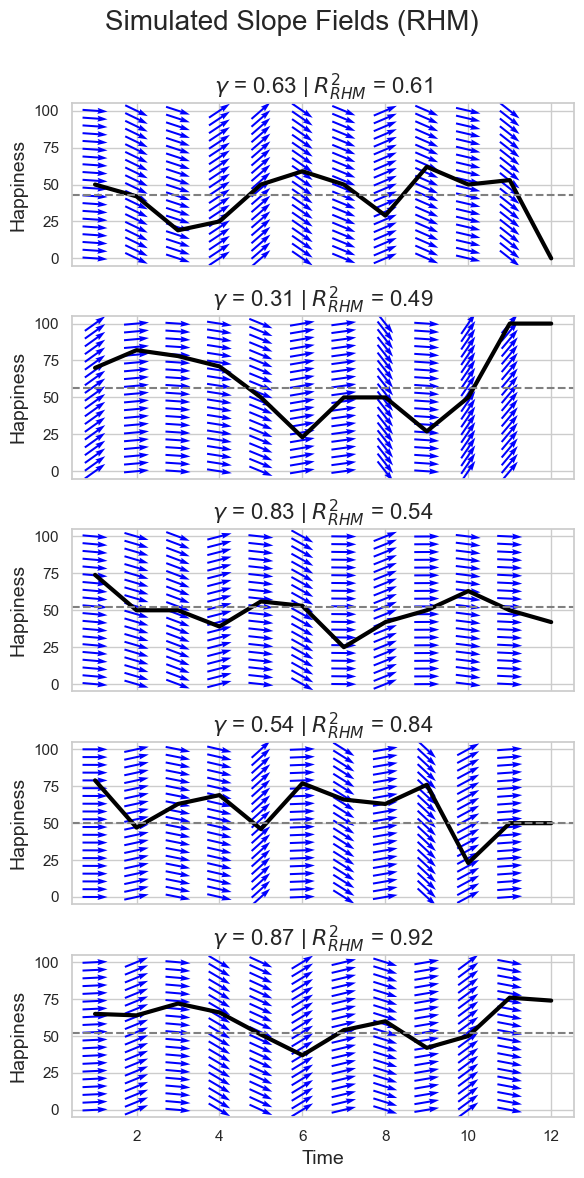

In [42]:
save1 = pd.read_csv('../Outputs/Lmfit_RHM_Dif.csv')
save2 = pd.read_csv('../Outputs/Lmfit_DC_Dif.csv')

participant_indices = [36, 0, 2, 171, 39]  # change this list to use different participant indices
time = [i for i in range(1, 13)]

fig, axs = plt.subplots(len(participant_indices), 1, figsize=(6, 12), sharex=True)

# get data for each participant
for idx, p in enumerate(participant_indices):
    H = np.fromstring(save1['H'][p][1:-1], sep=' ')
    CR = np.fromstring(save1['CR'][p][1:-1], sep=' ')
    EV = np.fromstring(save1['EV'][p][1:-1], sep=' ')
    PE = np.fromstring(save1['PE'][p][1:-1], sep=' ')
    forget = save1['Forgetting Factor'][p]

    # calculate value signaling terms
    wCR, wEV, wPE = [], [], []
    for i in range(30):
        CR_sum, EV_sum, PE_sum = 0, 0, 0
        for j in range(i+1):
            CR_sum += CR[i-j] * forget**j 
            EV_sum += EV[i-j] * forget**j 
            PE_sum += PE[i-j] * forget**j 
        wCR.append(CR_sum)
        wEV.append(EV_sum)
        wPE.append(PE_sum)

    df = pd.DataFrame({'H': H, 'wCR': wCR, 'wEV': wEV, 'wPE': wPE})
    df = df[df['H'] > -1].reset_index(drop=True)

    # model parameters
    mu = save2['Baseline'][p]

    # calculate value signaling differences
    controls = (
        save2['Certain Reward'][p] * (df['wCR'][1:].values - df['wCR'][:-1].values) +
        save2['Expected Value'][p] * (df['wEV'][1:].values - df['wEV'][:-1].values) +
        save2['Prediction Error'][p] * (df['wPE'][1:].values - df['wPE'][:-1].values)
    )

    # generate slope field
    t = np.linspace(1, 11, 11)
    X = np.linspace(0, 100, 20)
    T, X_grid = np.meshgrid(t, X)
    controls_broadcasted = np.tile(controls, (X_grid.shape[0], 1))

    # determine system dynamics
    dT = np.ones_like(T)
    dX = controls_broadcasted

    # normalize vectors
    magnitude = np.sqrt(dT**2 + dX**2)
    dT_unit = dT / magnitude
    dX_unit = dX / magnitude

    ax = axs[idx]
    ax.quiver(T, X_grid, dT_unit, dX_unit, angles='xy', pivot='middle', color='blue', scale=20)
    ax.plot(time, df['H'][:], linewidth=3, color='black')
    ax.axhline(mu, color='gray', linestyle='--')

    ax.set_ylabel('Happiness', fontsize=14)
    ax.set_title(r'$\gamma$ ' + f'= {save1["Forgetting Factor"][p]:.2f} | $R^2_{{RHM}}$ = {save1["R^2"][p]:.2f}', fontsize=16)

axs[-1].set_xlabel('Time', fontsize=14)
fig.suptitle('Simulated Slope Fields (RHM)', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('../Figures/slope_RHM.png', dpi=1200)
plt.show()

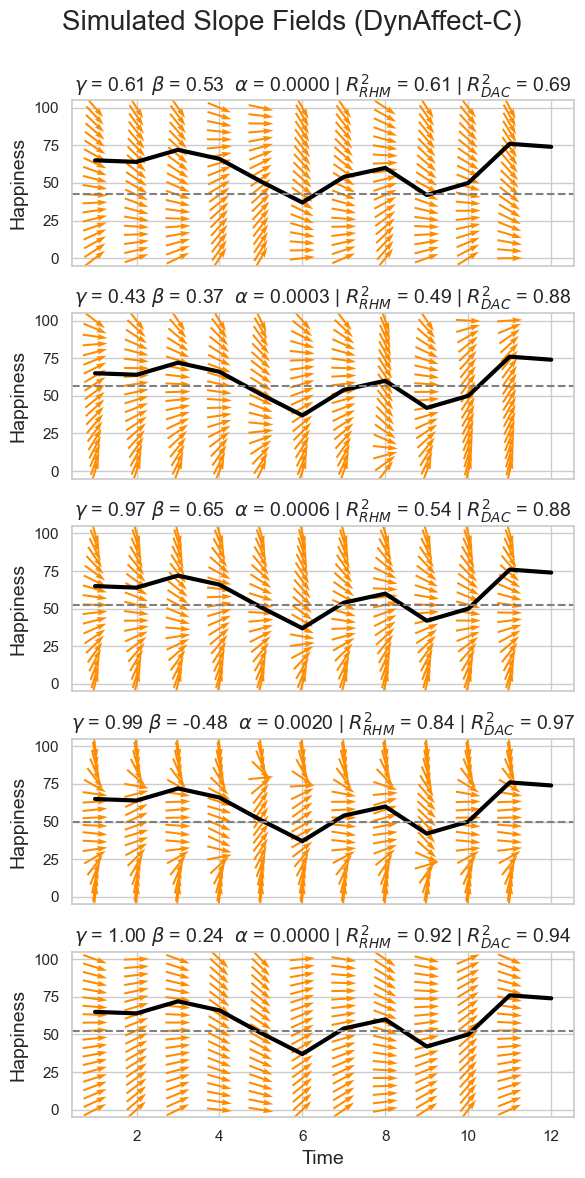

In [43]:
# participant indices
participant_indices = [36, 0, 2, 171, 39]
time = [i for i in range(1, 13)]

fig, axs = plt.subplots(len(participant_indices), 1, figsize=(6, 12), sharex=True)

# get data for each participant
for idx, p in enumerate(participant_indices):
    H = np.fromstring(save1['H'][p][1:-1], sep=' ')
    CR = np.fromstring(save1['CR'][p][1:-1], sep=' ')
    EV = np.fromstring(save1['EV'][p][1:-1], sep=' ')
    PE = np.fromstring(save1['PE'][p][1:-1], sep=' ')
    forget2 = save2['Forgetting Factor'][p]

    # calculate value signaling terms
    wCR2, wEV2, wPE2 = [], [], []
    for i in range(30):
        CR_sum, EV_sum, PE_sum = 0, 0, 0
        for j in range(i+1):
            CR_sum += CR[i-j] * forget2**j 
            EV_sum += EV[i-j] * forget2**j 
            PE_sum += PE[i-j] * forget2**j 
        wCR2.append(CR_sum)
        wEV2.append(EV_sum)
        wPE2.append(PE_sum)

    df2 = pd.DataFrame({'H': H, 'wCR': wCR2, 'wEV': wEV2, 'wPE': wPE2})
    df2 = df2[df2['H'] > -1].reset_index(drop=True)

    # model parameters
    alpha = save2['Cubic Attraction'][p]
    beta = save2['Linear Attraction'][p]
    mu = save2['Baseline'][p]

    # calculate value signaling differences
    controls = (
        save2['Certain Reward'][p] * (df2['wCR'][1:].values - df2['wCR'][:-1].values) +
        save2['Expected Value'][p] * (df2['wEV'][1:].values - df2['wEV'][:-1].values) +
        save2['Prediction Error'][p] * (df2['wPE'][1:].values - df2['wPE'][:-1].values)
    )

    # generate slope field
    t = np.linspace(1, 11, 11)
    X = np.linspace(0, 100, 20)
    T, X_grid = np.meshgrid(t, X)
    controls_broadcasted = np.tile(controls, (X_grid.shape[0], 1))

    # determine system dynamics
    dT = np.ones_like(T)
    dX = beta * (mu - X_grid) + alpha * (mu - X_grid)**3 + controls_broadcasted

    # normalize vectors
    magnitude = np.sqrt(dT**2 + dX**2)
    dT_unit = dT / magnitude
    dX_unit = dX / magnitude

    ax = axs[idx]
    ax.quiver(T, X_grid, dT_unit, dX_unit, angles='xy', pivot='middle', color='darkorange', scale=20)
    ax.plot(time, df['H'], linewidth=3, color='black')
    ax.axhline(mu, color='gray', linestyle='--')

    ax.set_ylabel('Happiness', fontsize=14)
    ax.set_title(r'$\gamma$ ' + f'= {save2["Forgetting Factor"][p]:.2f} ' + r'$\beta$ ' + f'= {save2["Linear Attraction"][p]:.2f}  ' + r'$\alpha$ ' + f'= {save2["Cubic Attraction"][p]:.4f}' + f' | $R^2_{{RHM}}$ = {save1["R^2"][p]:.2f} | $R^2_{{DAC}}$ = {save2["R^2"][p]:.2f}', fontsize=14)

axs[-1].set_xlabel('Time', fontsize=14)
fig.suptitle('Simulated Slope Fields (DynAffect-C)', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('../Figures/slope_DC.png', dpi=1200)
plt.show()

## Non-Differential

In [44]:
# parameter statistics

RAll = pd.read_csv('../Outputs/Lmfit_RHM_NonDif.csv')

params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'BIC', 'R^2']

print('Average RHM Weights')
for i in params:
    print( i + ' Mean: ' + str(np.mean(RAll[i])))
    print( i + ' Median: ' + str(np.median(RAll[i])))
    print( i + ' SD: ' + str(np.std(RAll[i])))

print('\n')

DCAll = pd.read_csv('../Outputs/Lmfit_DC_NonDif.csv')

params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Baseline', 'Forgetting Factor', 'Linear Attraction', 'Cubic Attraction', 'BIC', 'R^2']

print('Average DynAffect-C Weights')
for i in params:
    print( i + ' Mean: ' + str(np.mean(DCAll[i])))
    print( i + ' Median: ' + str(np.median(DCAll[i])))
    print( i + ' SD: ' + str(np.std(DCAll[i])))

# determine types of attraction dynamics
positive = 0
negative = 0
pos_neg = 0
neg_pos = 0
for i in range(0, len(DCAll)):
    if (DCAll['Cubic Attraction'][i]>=0):
        if (DCAll['Linear Attraction'][i]>0):
            positive += 1
        else:
            pos_neg += 1
    else:
        if (DCAll['Linear Attraction'][i]>0):
            neg_pos += 1
        else:
            negative += 1
print('Alpha positive, Beta positive: ', positive)
print('Alpha positive, Beta negative: ', pos_neg)
print('Alpha negative, Beta positive: ', neg_pos)
print('Alpha negative, Beta negative: ', negative)

Average RHM Weights
Certain Reward Mean: 0.0854123141585772
Certain Reward Median: 0.05
Certain Reward SD: 0.26527238455638813
Expected Value Mean: 0.06480088605321617
Expected Value Median: 0.04522064698989145
Expected Value SD: 0.1876665220188145
Prediction Error Mean: 0.14951044786895687
Prediction Error Median: 0.10637212305815799
Prediction Error SD: 0.1983978351434879
Forgetting Factor Mean: 0.5577920329467816
Forgetting Factor Median: 0.6221170970357048
Forgetting Factor SD: 0.3429986770218225
Baseline Mean: 58.34126301481632
Baseline Median: 55.89538609928442
Baseline SD: 16.37558555593237
BIC Mean: 46.15508952646876
BIC Median: 46.13814234195664
BIC SD: 19.08539062840041
R^2 Mean: 0.6556986523741805
R^2 Median: 0.7046038947779205
R^2 SD: 0.21862446768906524


Average DynAffect-C Weights
Certain Reward Mean: 0.09083909951702165
Certain Reward Median: 0.0525405139207972
Certain Reward SD: 0.27230090946452384
Expected Value Mean: 0.06824045685809488
Expected Value Median: 0.04751

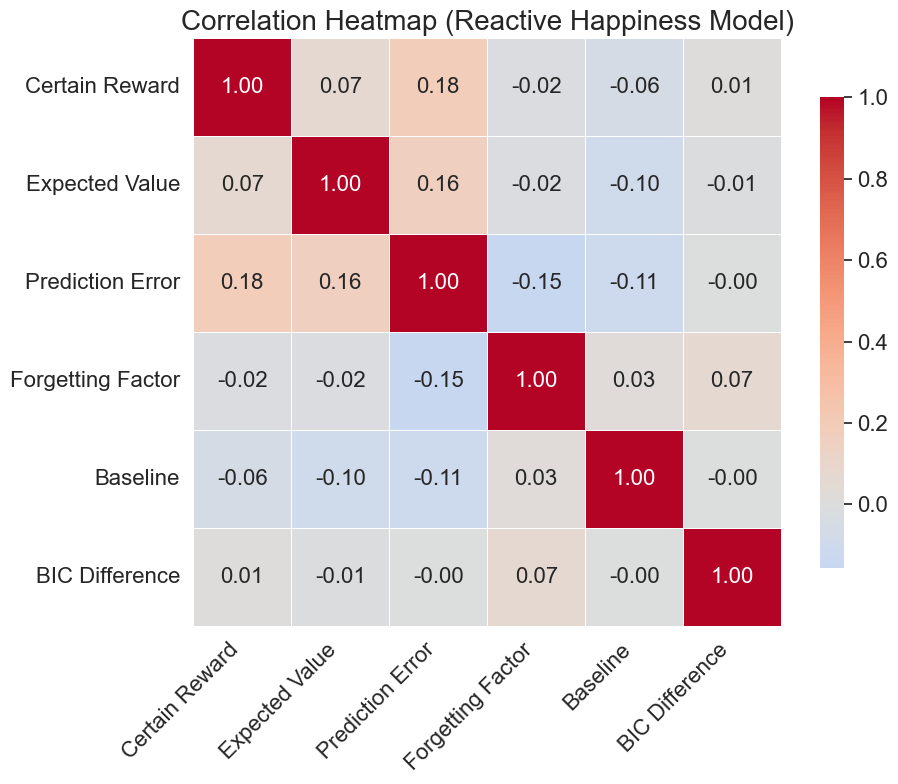

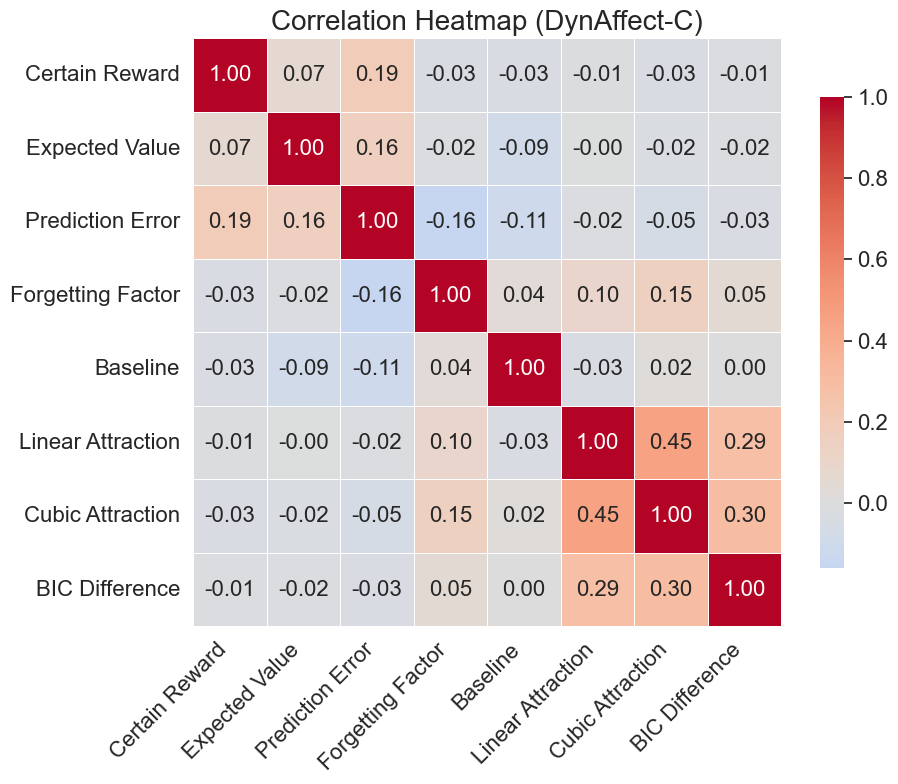

|Beta| and BIC Difference Correlation:  PearsonRResult(statistic=0.18749687533658713, pvalue=7.375689142339136e-116)


In [45]:
diff = DCAll['BIC'] - RAll['BIC']
RAll['BIC Difference'] = diff
DCAll['BIC Difference'] = diff

# correlation/p-value function
def correlation_with_pvalues(df, params):
    cols = params
    corr_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)
    pval_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)

    for param1 in cols:
        for param2 in cols:
            corr, pval = pearsonr(df[param1], df[param2])
            corr_matrix.loc[param1, param2] = corr
            pval_matrix.loc[param1, param2] = pval

    return corr_matrix, pval_matrix

# heatmap plotting function
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 16})
    plt.title(title, fontsize=20)
    plt.xticks(rotation=45, ha='right', fontsize = 16)
    plt.yticks(rotation=0, fontsize=16)
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=16)
    plt.tight_layout()
    plt.savefig('../Figures/' + title + '_NonDif.png', dpi=1200)
    plt.show()

# generate RHM heatmap
params1 = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'BIC Difference']
corr_matrix_rall, _, = correlation_with_pvalues(RAll, params1)
plot_heatmap(corr_matrix_rall, "Correlation Heatmap (Reactive Happiness Model)")

# generate DC heatmap
params2 = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'Linear Attraction', 'Cubic Attraction', 'BIC Difference']
corr_matrix_dcall, _, = correlation_with_pvalues(DCAll, params2)
plot_heatmap(corr_matrix_dcall, "Correlation Heatmap (DynAffect-C)")

DCAll['absBeta'] = np.abs(DCAll['Linear Attraction'])
print('|Beta| and BIC Difference Correlation: ', pearsonr(DCAll['absBeta'], DCAll['BIC Difference']))

Median RHM R^2:  0.6860502554564373
Median DC R^2:  0.8349591014434388
STD RHM R^2:  0.22464331009782917
STD RHM R^2:  0.22143618585018796
Median RHM BIC:  52.180814946803935
Median RHM BIC:  48.737824253671576
N =  2544
BIC Difference:  TtestResult(statistic=-13.545580802124249, pvalue=2.050629243700813e-40, df=2543)


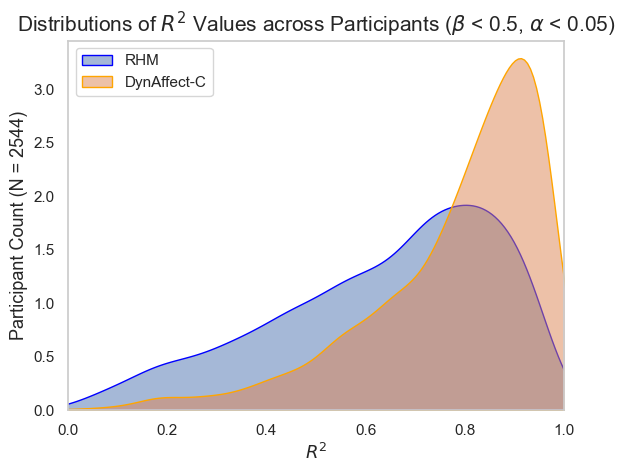

In [47]:
#filtered fits

list = {'Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'Linear Attraction', 'BIC', 'R^2'}
filtered = {'Certain Reward':[], 'Expected Value':[], 'Prediction Error':[], 'Forgetting Factor':[], 'Baseline':[], 'Linear Attraction':[], 'BIC':[], 'R^2':[]}

R_filtered = []
LA_filtered = []
R_BIC = []
LA_BIC = []

# filter participants with weak attraction dynamics
for i, j in enumerate(DCAll['Linear Attraction']):
    if j < 0.5 and DCAll['Cubic Attraction'][i] < 0.05:
        for k in list:
            filtered[k].append(DCAll[k][i])
        R_filtered.append(RAll['R^2'][i])
        LA_filtered.append(DCAll['R^2'][i])
        R_BIC.append(RAll['BIC'][i])
        LA_BIC.append(DCAll['BIC'][i])

print('Median RHM R^2: ', np.median(R_filtered))
print('Median DC R^2: ', np.median(LA_filtered))
print('STD RHM R^2: ',np.std(R_filtered))
print('STD RHM R^2: ',np.std(LA_filtered))
print('Median RHM BIC: ',np.median(R_BIC))
print('Median RHM BIC: ',np.median(LA_BIC))

R_filtered2 = [x for x in R_filtered if x > 0]
LA_filtered2 = [x for x in LA_filtered if x > 0]

print('N = ', len(R_filtered2))

sns.kdeplot(R_filtered2, alpha=0.5, fill=True, edgecolor='blue',
         label='RHM')
sns.kdeplot(LA_filtered2, alpha=0.5, fill=True, edgecolor='orange',
         label='DynAffect-C')
plt.title(r'Distributions of $R^2$ Values across Participants ($\beta$ < 0.5, $\alpha$ < 0.05)', fontsize=15)
plt.xlabel('$R^2$', fontsize=13)
plt.ylabel(f'Participant Count (N = {len(R_filtered2)})', fontsize=13)

plt.legend()
plt.xlim(0,1)
plt.grid(False)
plt.savefig('../Figures/subset.png', dpi=1200)

print('BIC Difference: ', stat.ttest_rel(LA_BIC, R_BIC))

Forgetting factor difference:  TtestResult(statistic=29.65487168149463, pvalue=9.997431245948548e-188, df=14629)


Text(0.5, 1.0, 'Forgetting Factor vs Linear Attraction (Non-Differential)')

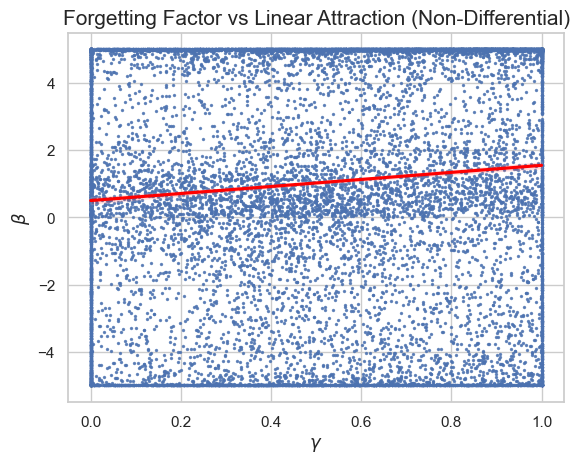

In [48]:
# forgetting factor analysis

print('Forgetting factor difference: ', stat.ttest_rel(RAll['Forgetting Factor'], DCAll['Forgetting Factor']))

sns.regplot(y=DCAll['Linear Attraction'], x=DCAll['Forgetting Factor'], line_kws={'color': 'red'}, scatter_kws={'s':2})
plt.xlabel(r'$\gamma$', fontsize=13)
plt.ylabel(r'$\beta$', fontsize=13)
plt.title('Forgetting Factor vs Linear Attraction (Non-Differential)', fontsize=15)

In [51]:
# calculate effect sizes

def cohen_d(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1, ddof=1)  # sample std
    std2 = np.std(group2, ddof=1)

    # pooled standard deviation
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))

    # cohen's d
    cohens_d = (mean1 - mean2) / pooled_std
    return cohens_d

print('BIC Difference: ', stat.ttest_rel(DCAll['BIC'], RAll['BIC']))
print('Forgetting Factor: ', stat.ttest_rel(DCAll['Forgetting Factor'], RAll['Forgetting Factor']))
print(f"Cohen's d (change in forgetting factor): {cohen_d(DCAll['Forgetting Factor'], RAll['Forgetting Factor']):.3f}")
print(f"Cohen's d (DynAffect-C and original happiness model BIC): {cohen_d(DCAll['BIC'], RAll['BIC']):.3f}")
print(f"Cohen's d (DynAffect-C and original happiness model BIC, filtered): {cohen_d(LA_BIC, R_BIC):.3f}")
DC_lin = pd.read_csv('../Outputs/Lmfit_Linear_Dif.csv')
print(f"Cohen's d (linear and cubic BIC): {cohen_d(DC_lin['BIC'], DCAll['BIC']):.3f}")

BIC Difference:  TtestResult(statistic=45.19722819680424, pvalue=0.0, df=14629)
Forgetting Factor:  TtestResult(statistic=-29.65487168149463, pvalue=9.997431245948548e-188, df=14629)
Cohen's d (change in forgetting factor): -0.202
Cohen's d (DynAffect-C and original happiness model BIC): 0.130
Cohen's d (DynAffect-C and original happiness model BIC, filtered): -0.114
Cohen's d (linear and cubic BIC): 0.006


/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_57791/3484407189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_57791/3484407189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_57791/3484407189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined

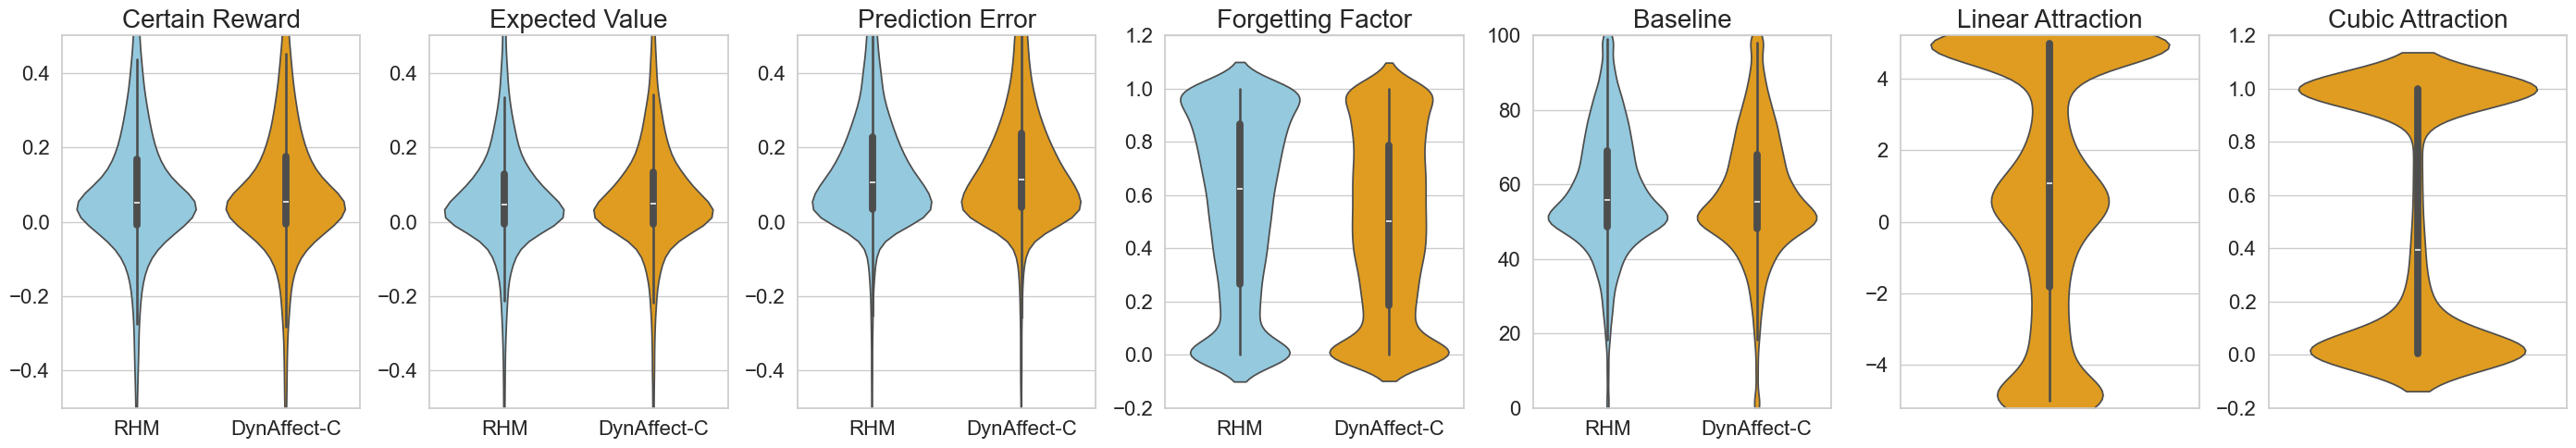

In [53]:
# generate violin plots

# parameters to compare
common_params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline']
dynonly_params = ['Linear Attraction', 'Cubic Attraction']

# prepare combined dataframe for common parameters
combined_data = pd.concat([
    RAll[common_params].assign(Model='RHM'),
    DCAll[common_params].assign(Model='DynAffect-C')
])

palette = {'RHM': 'skyblue', 'DynAffect-C': 'orange'}
sns.set(style='whitegrid')
n_plots = len(common_params) + len(dynonly_params)
fig, axes = plt.subplots(1, n_plots, figsize=(4 * n_plots, 5), sharey=False)

# plot shared parameters with both models
for i, param in enumerate(common_params):
    sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
    axes[i].set_title(param, fontsize=20)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', labelsize=16)
    axes[i].tick_params(axis='x', labelsize=16)

# plot DynAffect-only parameters (Beta, Alpha)
for j, param in enumerate(dynonly_params):
    sns.violinplot(data=DCAll, y=param, color='orange', ax=axes[len(common_params) + j])
    axes[len(common_params) + j].set_title(param, fontsize=20)
    axes[len(common_params) + j].set_xlabel('')
    axes[len(common_params) + j].set_ylabel('')
    axes[len(common_params) + j].set_xticks([])
    axes[len(common_params) + j].tick_params(axis='y', labelsize=16)

axes[0].set_ylim([-0.5, 0.5])
axes[1].set_ylim([-0.5, 0.5])
axes[2].set_ylim([-0.5, 0.5])
axes[3].set_ylim([-0.2, 1.2])
axes[4].set_ylim([0, 100])
axes[5].set_ylim([-5.2, 5.2])
axes[6].set_ylim([-0.2, 1.2])

plt.tight_layout()
plt.savefig('../Figures/violin_NonDif.png', dpi=1200)
plt.show()

## Posterior Predictive Checks

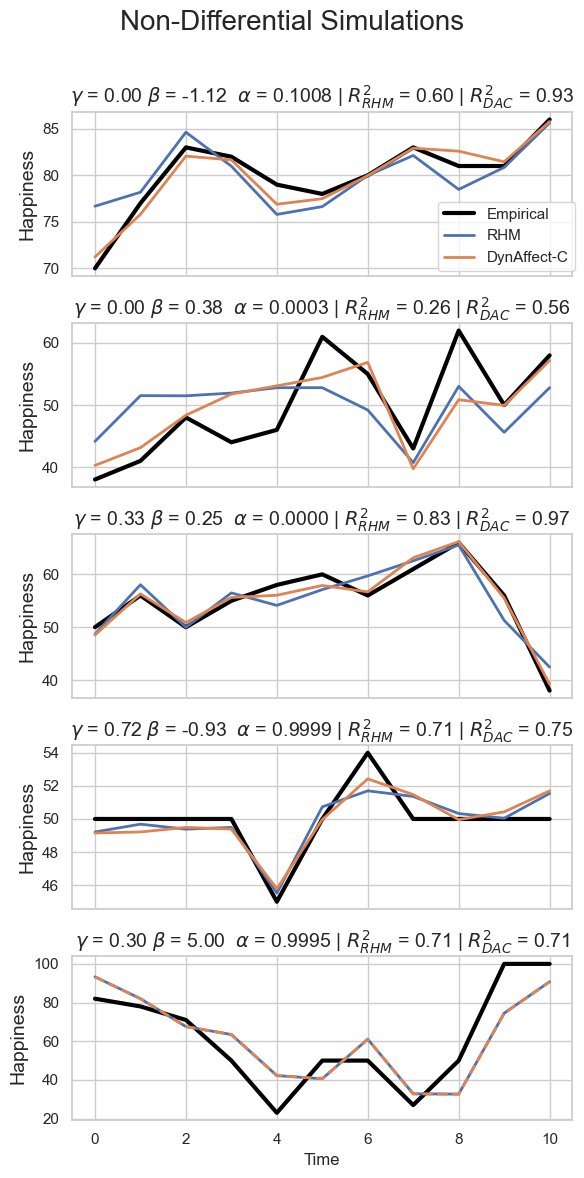

In [70]:
save1 = pd.read_csv('../Outputs/Lmfit_RHM_NonDif.csv')
save2 = pd.read_csv('../Outputs/Lmfit_DC_NonDif.csv')

# participant indices
participant_indices = [45, 208, 38, 48, 0]
time = [i for i in range(0, 11)]

fig, axs = plt.subplots(len(participant_indices), 1, figsize=(6, 12), sharex=True)

# get value signaling data for each participant
for idx, p in enumerate(participant_indices):
    H = np.fromstring(save1['H'][p][1:-1], sep=' ')
    CR = np.fromstring(save1['CR'][p][1:-1], sep=' ')
    EV = np.fromstring(save1['EV'][p][1:-1], sep=' ')
    PE = np.fromstring(save1['PE'][p][1:-1], sep=' ')

    # calculate weighted value signals for RHM
    forget = save1['Forgetting Factor'][p]
    wCR, wEV, wPE = [], [], []
    for i in range(30):
        CR_sum, EV_sum, PE_sum = 0, 0, 0
        for j in range(i+1):
            CR_sum += CR[i-j] * forget**j 
            EV_sum += EV[i-j] * forget**j 
            PE_sum += PE[i-j] * forget**j 
        wCR.append(CR_sum)
        wEV.append(EV_sum)
        wPE.append(PE_sum)

    df = pd.DataFrame({'H': H, 'wCR': wCR, 'wEV': wEV, 'wPE': wPE})
    df = df[df['H'] > -1].reset_index(drop=True)

    # simulate RHM outputs
    H_out = []
    for k in range(1, len(df)):
        pred = (save1['Certain Reward'][p] * df['wCR'][k] +
                save1['Expected Value'][p] * df['wEV'][k] +
                save1['Prediction Error'][p] * df['wPE'][k] +
                save1['Baseline'][p])
        H_out.append(pred)

    # calculate weighted value signals for DC
    forget2 = save2['Forgetting Factor'][p]
    wCR2, wEV2, wPE2 = [], [], []
    for i in range(30):
        CR_sum, EV_sum, PE_sum = 0, 0, 0
        for j in range(i+1):
            CR_sum += CR[i-j] * forget2**j 
            EV_sum += EV[i-j] * forget2**j 
            PE_sum += PE[i-j] * forget2**j 
        wCR2.append(CR_sum)
        wEV2.append(EV_sum)
        wPE2.append(PE_sum)

    df2 = pd.DataFrame({'H': H, 'wCR': wCR2, 'wEV': wEV2, 'wPE': wPE2})
    df2 = df2[df2['H'] > -1].reset_index(drop=True)

    # simulate DC outputs
    H_out2 = []
    for k in range(1, len(df2)):
        cubic_term = (
            -1 * (save2['Baseline'][p] - df2['H'][k-1]) * np.exp(-save2['Linear Attraction'][p])
        ) / (
            np.sqrt(1 + (save2['Cubic Attraction'][p]/save2['Linear Attraction'][p]) *
                    (save2['Baseline'][p] - df2['H'][k-1])**2 *
                    (1 - np.exp(-2 * save2['Linear Attraction'][p])))
        )

        pred = (cubic_term +
                save2['Certain Reward'][p] * df2['wCR'][k] +
                save2['Expected Value'][p] * df2['wEV'][k] +
                save2['Prediction Error'][p] * df2['wPE'][k] +
                save2['Baseline'][p])
        H_out2.append(pred)

    # plt results
    ax = axs[idx]
    ax.plot(time, df['H'][1:], color='black', linewidth=3)
    ax.plot(time, H_out, linewidth=2)
    if idx != 4:    
        ax.plot(time, H_out2, linewidth=2)
    else:
        ax.plot(time, H_out2, linewidth=2, linestyle='--')
    ax.set_ylabel('Happiness', fontsize=14)
    ax.set_title(r'$\gamma$ ' + f'= {save2["Forgetting Factor"][p]:.2f} ' + r'$\beta$ ' + f'= {save2["Linear Attraction"][p]:.2f}  ' + r'$\alpha$ ' + f'= {save2["Cubic Attraction"][p]:.4f}' + f' | $R^2_{{RHM}}$ = {save1["R^2"][p]:.2f} | $R^2_{{DAC}}$ = {save2["R^2"][p]:.2f}', fontsize=14)

axs[-1].set_xlabel('Time')
fig.suptitle('Non-Differential Simulations', fontsize=20)
axs[0].legend(['Empirical', 'RHM', 'DynAffect-C'], bbox_to_anchor=(1.02, 0.5), loc='upper right')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('../Figures/sim.png', dpi=1200)
plt.show()

0.0465258973784443 2.0697632496791127e-10 0.4542698795180304


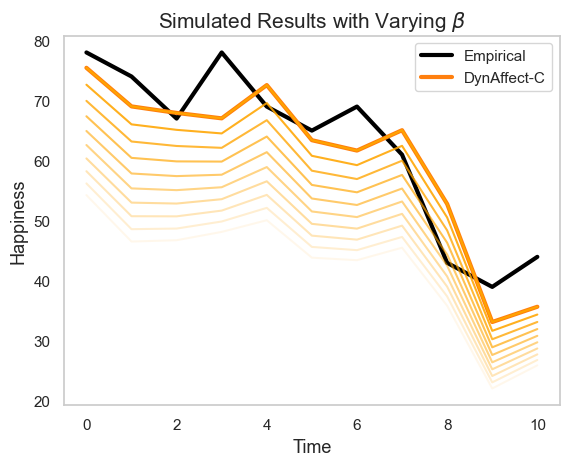

In [72]:
# varying attraction strength
save1 = pd.read_csv('../Outputs/Lmfit_RHM_Dif.csv')
save2 = pd.read_csv('../Outputs/Lmfit_DC_Dif.csv')

# participant number
p = 141
print(save2['Linear Attraction'][p], save2['Cubic Attraction'][p], save2['R^2'][p])

H = save2['H'][p]
H = H[1:-1]
H = np.fromstring(H, sep=' ')
time = [i for i in range(0, 11)]

CR = save2['CR'][p]
CR = CR[1:-1]
CR = np.fromstring(CR, sep=' ')
wCR = []

EV = save2['EV'][p]
EV = EV[1:-1]
EV = np.fromstring(EV, sep=' ')
wEV = []

PE = save2['PE'][p]
PE = PE[1:-1]
PE = np.fromstring(PE, sep=' ')
wPE = []
forget2 = save2['Forgetting Factor'][p]
wCR2 = []
wEV2 = []
wPE2 = []

# calculate weighted value signals
for i in range(0, 30):
    CR_sum = 0
    EV_sum = 0
    PE_sum = 0
    for j in range(0, i+1):
            CR_sum += CR[i-j] * pow(forget2, j)
            EV_sum += EV[i-j] * pow(forget2, j)
            PE_sum += PE[i-j] * pow(forget2, j)
    wCR2.append(CR_sum)
    wEV2.append(EV_sum)
    wPE2.append(PE_sum)

data2 = {'H':H, 'wCR':wCR2, 'wEV':wEV2, 'wPE':wPE2}
df2 = pd.DataFrame(data2)
df2 = df2[df2['H']>-1].reset_index()
H_out2 = []

for k in range(1, len(df2)):
    H_out2.append((-1*(save2['Baseline'][p]-df2['H'][k-1]) * np.exp(-1*save2['Linear Attraction'][p])) / (np.sqrt(1+(save2['Cubic Attraction'][p]/save2['Linear Attraction'][p])*((save2['Baseline'][p]-df2['H'][k-1])**2)*(1-np.exp(-2*save2['Linear Attraction'][p])))) + save2['Certain Reward'][p]*df2['wCR'][k]+save2['Expected Value'][p]*df2['wEV'][k]+save2['Prediction Error'][p]*df2['wPE'][k] + save2['Baseline'][p])

plt.plot(time, df2['H'][1:], linewidth=3, color = 'black')
plt.plot(time, H_out2, linewidth =3, color = '#ff7f0e')
plt.title(r'Simulated Results with Varying $\beta$', fontsize=15)
plt.xlabel('Time', fontsize=13)
plt.ylabel('Happiness', fontsize=13)
plt.grid(False)

# plot adjusted attraction strengths
count = 0.05
for b in range(10, 0, -1):
    H_temp = []
    
    for k in range(1, len(df2)):
         H_temp.append((-1*(save2['Baseline'][p]-df2['H'][k-1]) * np.exp(-1*save2['Linear Attraction'][p]*b)) / (np.sqrt(1+(save2['Cubic Attraction'][p]/(save2['Linear Attraction'][p]*b))*((save2['Baseline'][p]-df2['H'][k-1])**2)*(1-np.exp(-2*save2['Linear Attraction'][p]*b)))) + save2['Certain Reward'][p]*df2['wCR'][k]+save2['Expected Value'][p]*df2['wEV'][k]+save2['Prediction Error'][p]*df2['wPE'][k] + save2['Baseline'][p])

    plt.plot(time, H_temp,color = 'orange', alpha = 0.03 + count)
    
    count += 0.1
plt.legend(['Empirical', 'DynAffect-C'])
legend = plt.gca().get_legend()
plt.savefig('../Figures/beta_variation.png', dpi=1200)


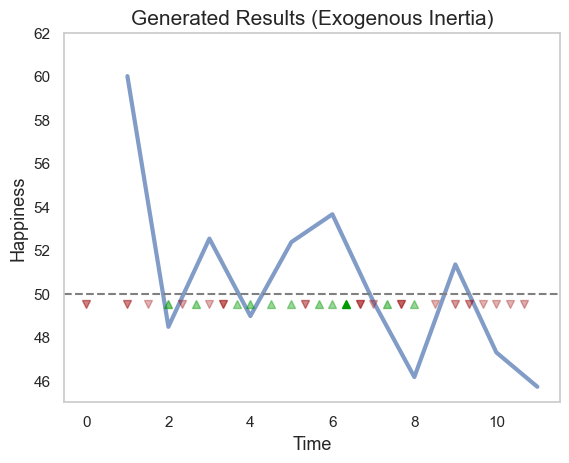

In [76]:
# generative model (exogenous inertia)
save1 = pd.read_csv('../Outputs/Lmfit_RHM_NonDif.csv')
save2 = pd.read_csv('../Outputs/Lmfit_DC_NonDif.csv')
p = 313

H = save2['H'][p]
H = H[1:-1]
H = np.fromstring(H, sep=' ')
time = [i for i in range(1, 12)]

CR = save1['CR'][p]
CR = CR[1:-1]
CR = np.fromstring(CR, sep=' ')
wCR = []

EV = save1['EV'][p]
EV = EV[1:-1]
EV = np.fromstring(EV, sep=' ')
wEV = []

PE = save1['PE'][p]
PE = PE[1:-1]
PE = np.fromstring(PE, sep=' ')
wPE = []

CR_coefficient = 0.05
EV_coefficient = 0.05
PE_coefficient = 0.1
Mu = 50
forget = 0.5

# simulate value signals
for i in range(0, 30):
    CR_sum = 0
    EV_sum = 0
    PE_sum = 0
    for j in range(0, i+1):
        CR_sum += CR[i-j] * pow(forget, j)
        EV_sum += EV[i-j] * pow(forget, j)
        PE_sum += PE[i-j] * pow(forget, j)
    wCR.append(CR_sum)
    wEV.append(EV_sum)
    wPE.append(PE_sum)

data = {'H':H, 'wCR':wCR, 'wEV':wEV, 'wPE':wPE}
df = pd.DataFrame(data)
df = df[df['H']>-1].reset_index()
H_out = [60]

for k in range(1, len(df)-1):
    H_out.append(CR_coefficient*df['wCR'][k]+EV_coefficient*df['wEV'][k]+PE_coefficient*df['wPE'][k]+Mu)

plt.plot(time, H_out, linewidth=3, alpha = 0.7)
plt.title('Generated Results (Exogenous Inertia)', fontsize=15)
plt.xlabel('Time', fontsize=13)
plt.ylabel('Happiness', fontsize=13)
plt.axhline(Mu, color='gray', linestyle='--', label='Mean (μ)')
plt.ylim([45, 62])

# calculate valence of environmental stimuli
all_vals = []
vals = []
for i in range(0, 30):
    vals.append(0.05 * CR[i] + 0.05 * EV[i] + 0.05 * PE[i])
    if(H[i] > -1):
        all_vals.append(vals)
        vals = []

# set minimum alpha to ensure markers are always visible (darker)
min_alpha = 0.3
max_val = max(abs(val) for signal in all_vals for val in signal)

# scale events values
for t, signal in zip(time, all_vals):
    for i in range(len(signal)):
        val = signal[i]
        norm = abs(val) / max_val if max_val != 0 else 0
        alpha = min_alpha + (1.0 - min_alpha) * norm

        if val > 0:
            color = (0, 0.6, 0, alpha)  # dark green = postitive valence
            plt.plot(t - 1 + (i / len(signal)), 49.5, marker='^', color=color)
        else:
            color = (0.6, 0, 0, alpha)  # dark red = negative valence
            plt.plot(t - 1 + (i / len(signal)), 49.5, marker='v', color=color)
plt.grid(False)
plt.savefig('../Figures/exogenous.png', dpi=1200)

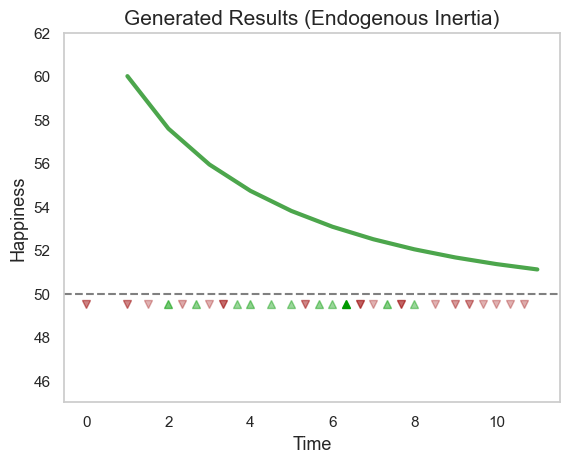

In [78]:
# generative model (endogenous inertia)

CR = save1['CR'][p]
CR = CR[1:-1]
CR = np.fromstring(CR, sep=' ')
wCR = []

EV = save1['EV'][p]
EV = EV[1:-1]
EV = np.fromstring(EV, sep=' ')
wEV = []

PE = save1['PE'][p]
PE = PE[1:-1]
PE = np.fromstring(PE, sep=' ')
wPE = []

CR_coefficient = 0.05
EV_coefficient = 0.05
PE_coefficient = 0.1
Mu = 50
forget = 0.5
Beta = 0.2
Alpha = 0.001

# simulate value signals
for i in range(0, 30):
    CR_sum = 0
    EV_sum = 0
    PE_sum = 0
    for j in range(0, i+1):
        CR_sum += CR[i-j] * pow(forget, j)
        EV_sum += EV[i-j] * pow(forget, j)
        PE_sum += PE[i-j] * pow(forget, j)
    wCR.append(CR_sum)
    wEV.append(EV_sum)
    wPE.append(PE_sum)

data = {'H':H, 'wCR':wCR, 'wEV':wEV, 'wPE':wPE}
df = pd.DataFrame(data)
df = df[df['H']>-1].reset_index()
H_out = [60]


for k in range(1, len(df)-1):
    H_out.append((-1*(Mu-H_out[k-1]) * np.exp(-1*Beta)) / (np.sqrt(1+(Alpha/Beta)*((Mu-H_out[k-1])**2)*(1-np.exp(-2*Beta)))) + Mu)

plt.plot(time, H_out, linewidth=3, alpha=0.7, color='green')
plt.title('Generated Results (Endogenous Inertia)', fontsize=15)
plt.xlabel('Time', fontsize=13)
plt.ylabel('Happiness', fontsize=13)
plt.axhline(Mu, color='gray', linestyle='--', label='Mean (μ)')
plt.ylim([45, 62])

# calculate valence of environmental stimuli
all_vals = []
vals = []
for i in range(0, 30):
    vals.append(0.05 * CR[i] + 0.05 * EV[i] + 0.05 * PE[i])
    if(H[i] > -1):
        all_vals.append(vals)
        vals = []

# set minimum alpha to ensure markers are always visible (darker)
min_alpha = 0.3
max_val = max(abs(val) for signal in all_vals for val in signal)

# scale events values
for t, signal in zip(time, all_vals):
    for i in range(len(signal)):
        val = signal[i]
        norm = abs(val) / max_val if max_val != 0 else 0
        alpha = min_alpha + (1.0 - min_alpha) * norm

        if val > 0:
            color = (0, 0.6, 0, alpha) 
            plt.plot(t - 1 + (i / len(signal)), 49.5, marker='^', color=color)
        else:
            color = (0.6, 0, 0, alpha) 
            plt.plot(t - 1 + (i / len(signal)), 49.5, marker='v', color=color)
plt.grid(False)
plt.savefig('../Figures/endogenous.png', dpi=1200)

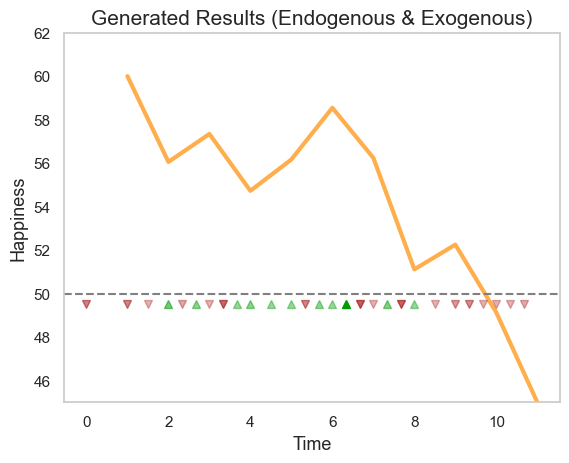

In [84]:
# generative model (endogenous and exogenous)

CR = save1['CR'][p]
CR = CR[1:-1]
CR = np.fromstring(CR, sep=' ')
wCR = []

EV = save1['EV'][p]
EV = EV[1:-1]
EV = np.fromstring(EV, sep=' ')
wEV = []

PE = save1['PE'][p]
PE = PE[1:-1]
PE = np.fromstring(PE, sep=' ')
wPE = []

Mu = 50
Beta = 0.2
Alpha = 0.001

H_out = [60]
for k in range(1, len(df)-1):
    H_out.append((-1*(Mu-H_out[k-1]) * np.exp(-1*Beta)) / (np.sqrt(1+(Alpha/Beta)*((Mu-H_out[k-1])**2)*(1-np.exp(-2*Beta)))) + Mu + CR_coefficient*df['wCR'][k]+EV_coefficient*df['wEV'][k]+PE_coefficient*df['wPE'][k])

plt.plot(time, H_out, linewidth=3, alpha = 0.7, color='darkorange')
plt.title('Generated Results (Endogenous & Exogenous)', fontsize=15)
plt.xlabel('Time', fontsize=13)
plt.ylabel('Happiness', fontsize=13)
plt.axhline(Mu, color='gray', linestyle='--', label='Mean (μ)')
plt.ylim([45, 62])

# calculate valence of environmental stimuli
all_vals = []
vals = []
for i in range(0, 30):
    vals.append(0.05 * CR[i] + 0.05 * EV[i] + 0.05 * PE[i])
    if(H[i] > -1):
        all_vals.append(vals)
        vals = []

# set minimum alpha to ensure markers are always visible (darker)
min_alpha = 0.3
max_val = max(abs(val) for signal in all_vals for val in signal)

# scale events values
for t, signal in zip(time, all_vals):
    for i in range(len(signal)):
        val = signal[i]
        norm = abs(val) / max_val if max_val != 0 else 0
        alpha = min_alpha + (1.0 - min_alpha) * norm

        if val > 0:
            color = (0, 0.6, 0, alpha) 
            plt.plot(t - 1 + (i / len(signal)), 49.5, marker='^', color=color)
        else:
            color = (0.6, 0, 0, alpha)
            plt.plot(t - 1 + (i / len(signal)), 49.5, marker='v', color=color)
plt.grid(False)
plt.savefig('../Figures/combined.png', dpi=1200)